In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_time_series(time_series,tmin,tmax,tlabel=None,xlabel=None):
    ts = [t for t,x in time_series]
    xs = [x for t,x in time_series]
    plt.scatter(ts, xs)
    plt.xlabel(tlabel,fontsize=18)
    plt.ylabel(xlabel,fontsize=18)
    total_t = tmax-tmin
    plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
    plt.xlim(tmin-total_t/10,tmax+total_t/10)
    xmin, xmax = plt.ylim()
    plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
    plt.ylim(xmin,xmax)

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)
    
# def piecewise_constant_interpolate(time_series,time):
#     value = time_series[0][1]
#     for t,x in time_series:
#         if t > time:
#             return value
#         else:
#             value = x
#     return value

# def q(t):
#     return piecewise_constant_interpolate(flow_rates,t)

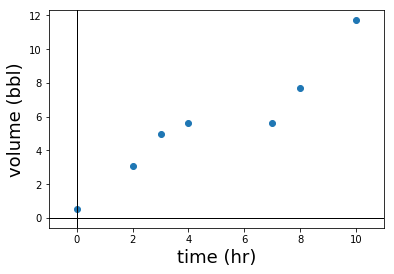

In [4]:
volumes = [(0,0.5), (2,3.1), (3,5.0), (4,5.6), (7,5.6), (8,7.7), (10,11.7)]
plot_time_series(volumes,0,10,tlabel='time (hr)',xlabel='volume (bbl)')

In [7]:
def piecewise_linear_interpolate(time_series,time):
    if time <= time_series[0][0]:
        return time_series[0][1] #<1>
    for (t1,x1),(t2,x2) in zip(time_series[:-1],time_series[1:]): #<2>
        if t1 <= time <= t2: #<3>
            weight = (time-t1)/(t2-t1) #<4>
            return x1 + weight * (x2-x1) #<5>
    return time_series[-1][1] #<6>

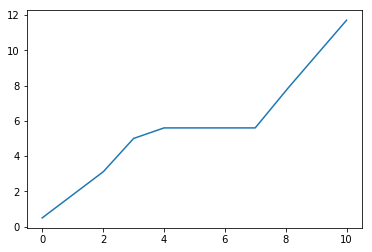

In [10]:
def interpolated_volume(t):
    return piecewise_linear_interpolate(volumes,t)
plot_function(interpolated_volume,0,10)

In [9]:
(interpolated_volume(10) - interpolated_volume(0)) / 10

1.1199999999999999

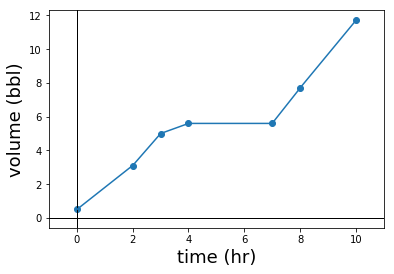

In [35]:
volumes = [(0,0.5), (2,3.1), (3,5.0), (4,5.6), (7,5.6), (8,7.7), (10,11.7)]
plot_time_series(volumes,0,10,tlabel='time (hr)',xlabel='volume (bbl)')
plot_function(interpolated_volume,0,10)

(-0.5, 3.6)

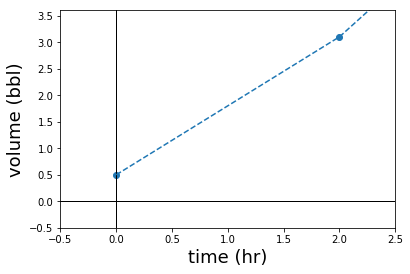

In [33]:
plot_time_series(volumes,0,10,tlabel='time (hr)',xlabel='volume (bbl)')
plot_function(interpolated_volume,0,10, linestyle='dashed')
plt.xlim(-0.5,2.5)
plt.ylim(-0.5,3.6)

In [27]:
def get_flow_rate_function(volumes):
    def flow_rate_function(time):
        for (t1,v1),(t2,v2) in zip(volumes[:-1],volumes[1:]): #<2>
            if t1 <= time <= t2: #<3>
                return (v2-v1)/(t2-t1) #<4>
        raise ValueError("time out of bounds of time series") #<5>
    return flow_rate_function

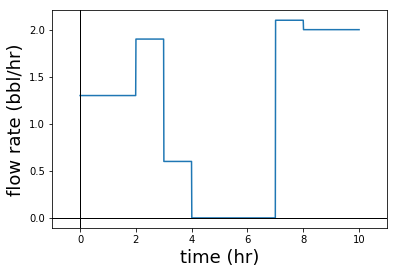

In [34]:
plot_function(get_flow_rate_function(volumes),0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)',axes=True)

In [29]:
get_flow_rate_function(volumes)(-1)

ValueError: time out of bounds

In [36]:
flow_rates = [(0,1.3), (2,1.9), (3,0.6), (4,0.0), (7,2.1), (8,2.0)]

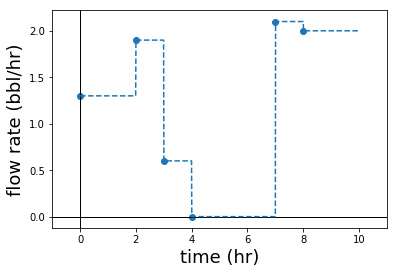

In [39]:
plot_time_series(flow_rates,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_function(get_flow_rate_function(volumes),0,10,linestyle='dashed')